# PCBのGNDガード有の特性インピーダンス計算

Conductor 1 charge density range: 4.4173131554525647e-13 3.384609282142903e-12
Conductor 1 total charge: 2.9525572520294233e-16


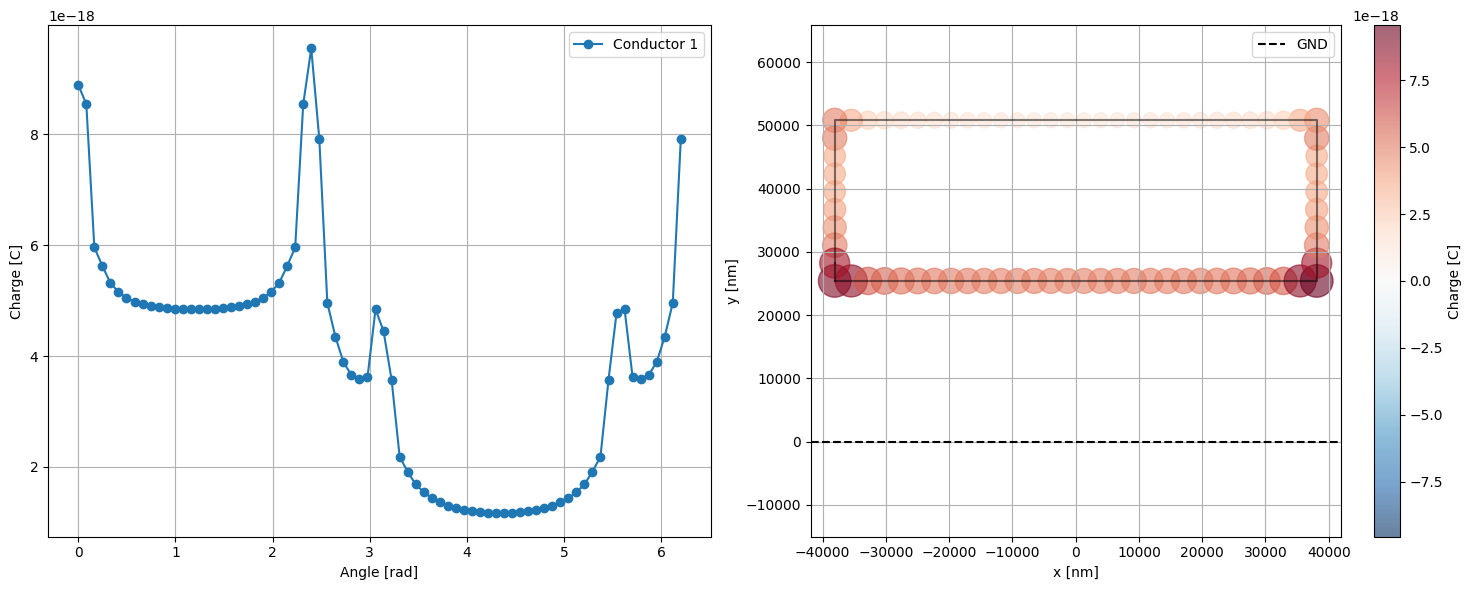

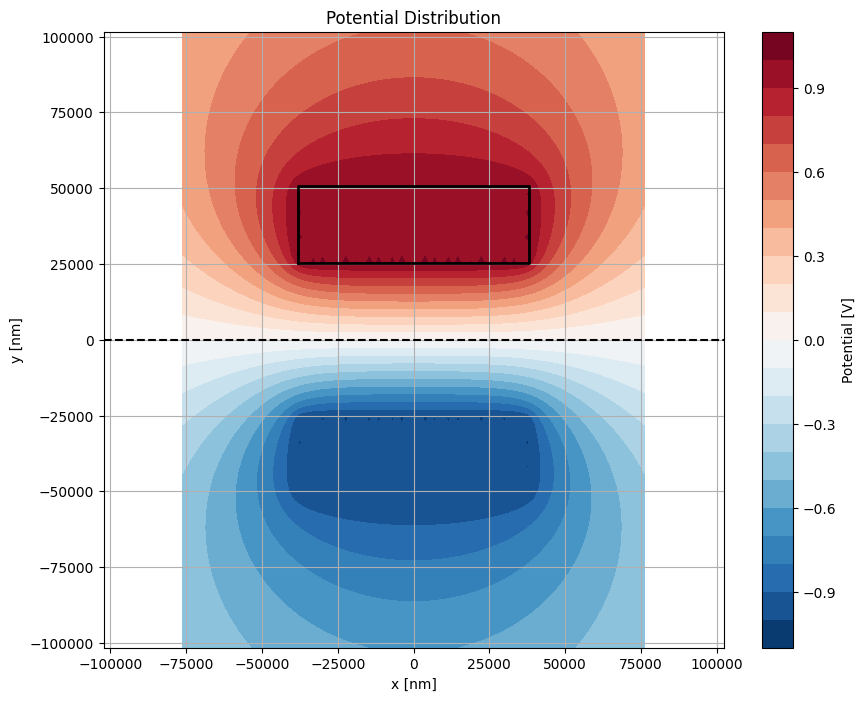

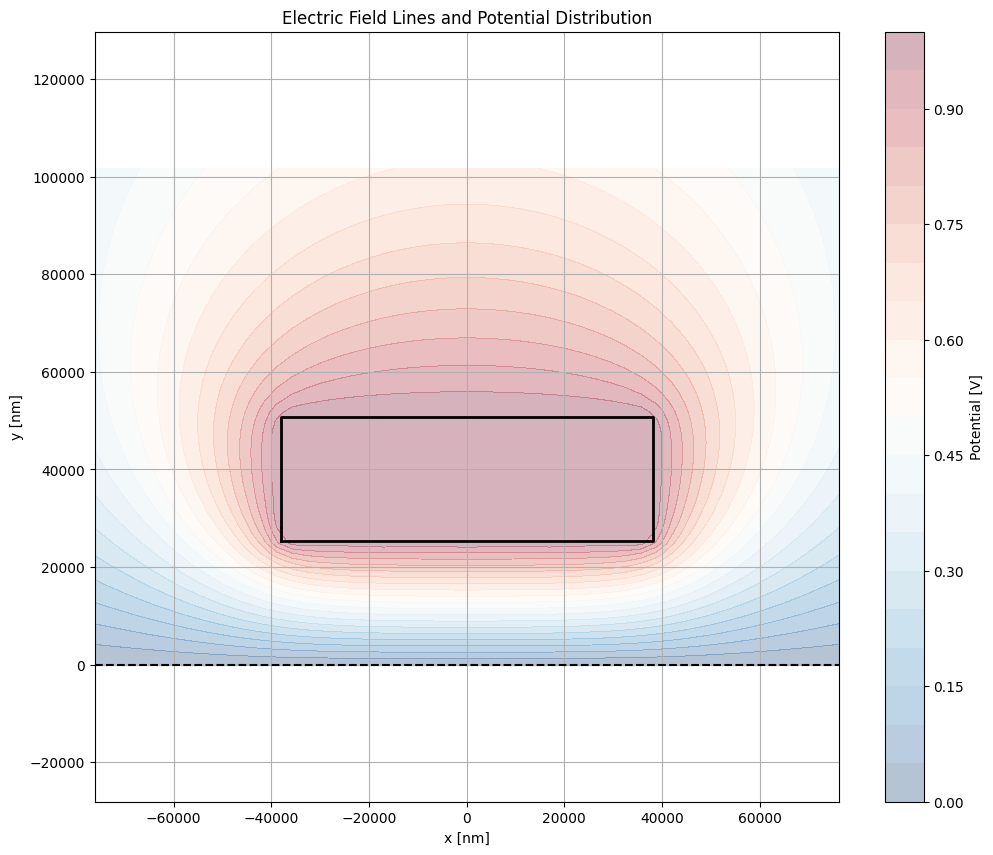


 C Matrix [F/m]:
[[1.10057441e-10]]

 L Matrix [H/m]:
[[2.02190137e-07]]

 Z Matrix [H/m]:
[[42.86178737]]
Conductor 1 charge density range: -1.3218550029535523e-12 -6.101847544092835e-16
Conductor 1 total charge: -4.7186652601895124e-17
Conductor 2 charge density range: 4.81857312871138e-13 3.5387439312230536e-12
Conductor 2 total charge: 3.072608677146632e-16


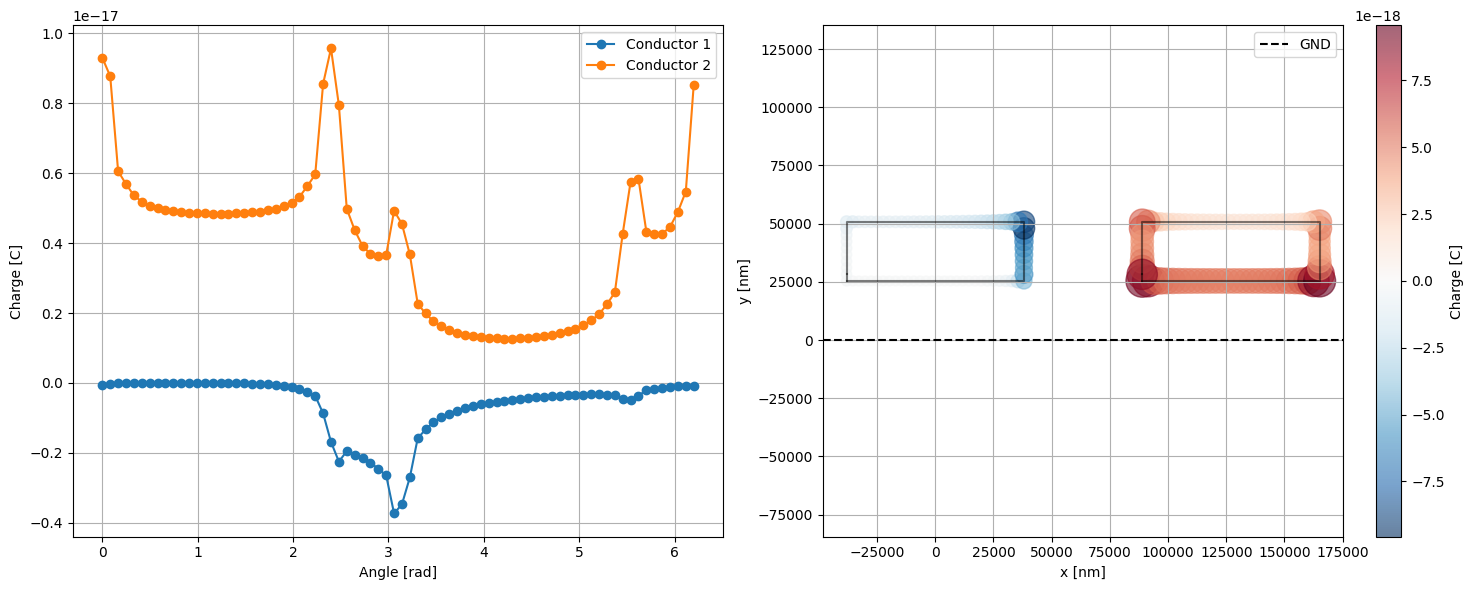

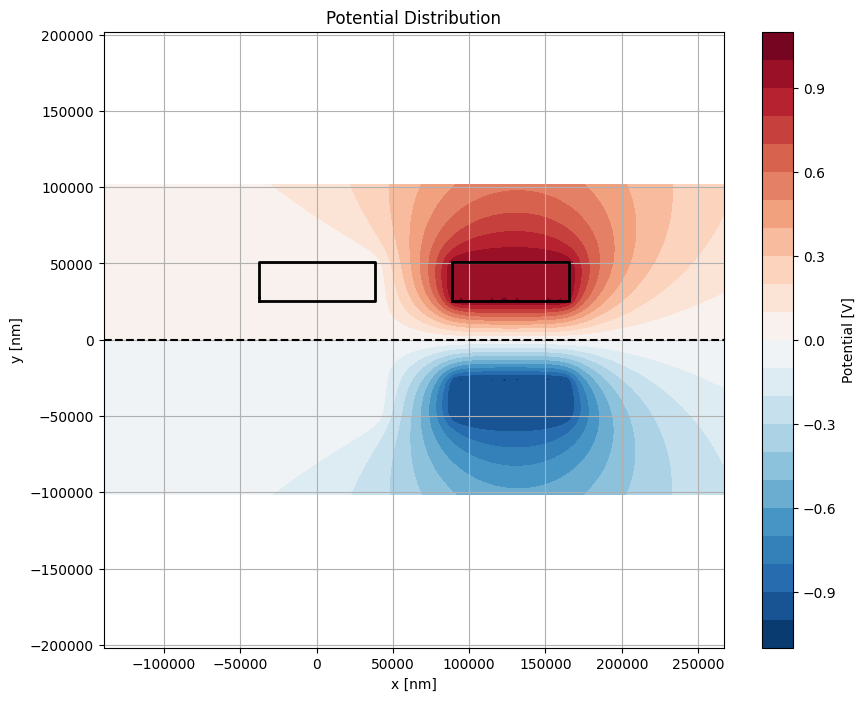

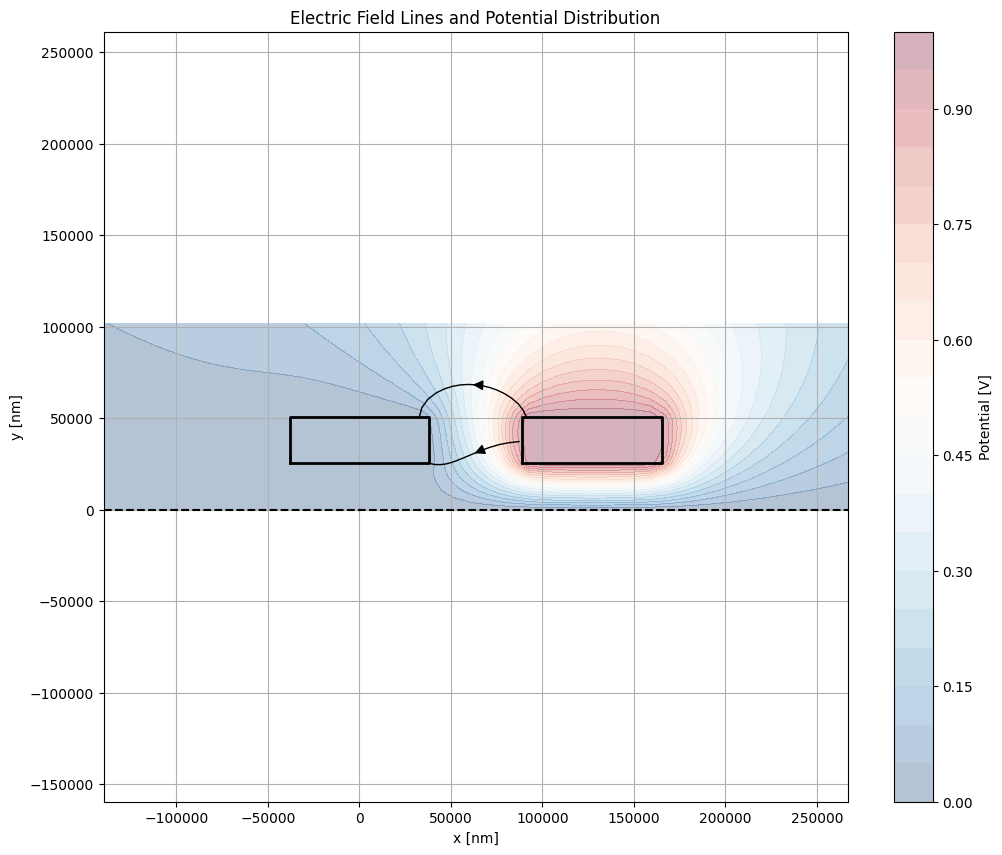


 C Matrix [F/m]:
[[ 1.14457678e-10 -1.73565361e-11]
 [-1.73565361e-11  1.14457678e-10]]

 L Matrix [H/m]:
[[1.98992966e-07 3.01755955e-08]
 [3.01755955e-08 1.98992966e-07]]

 Z Matrix [H/m]:
[[42.66628446 23.23122422]
 [23.23122422 42.66628446]]
Conductor 1 charge density range: 1.3366675095513396e-12 2.9354625463954195e-12
Conductor 1 total charge: 2.5977524774097267e-16


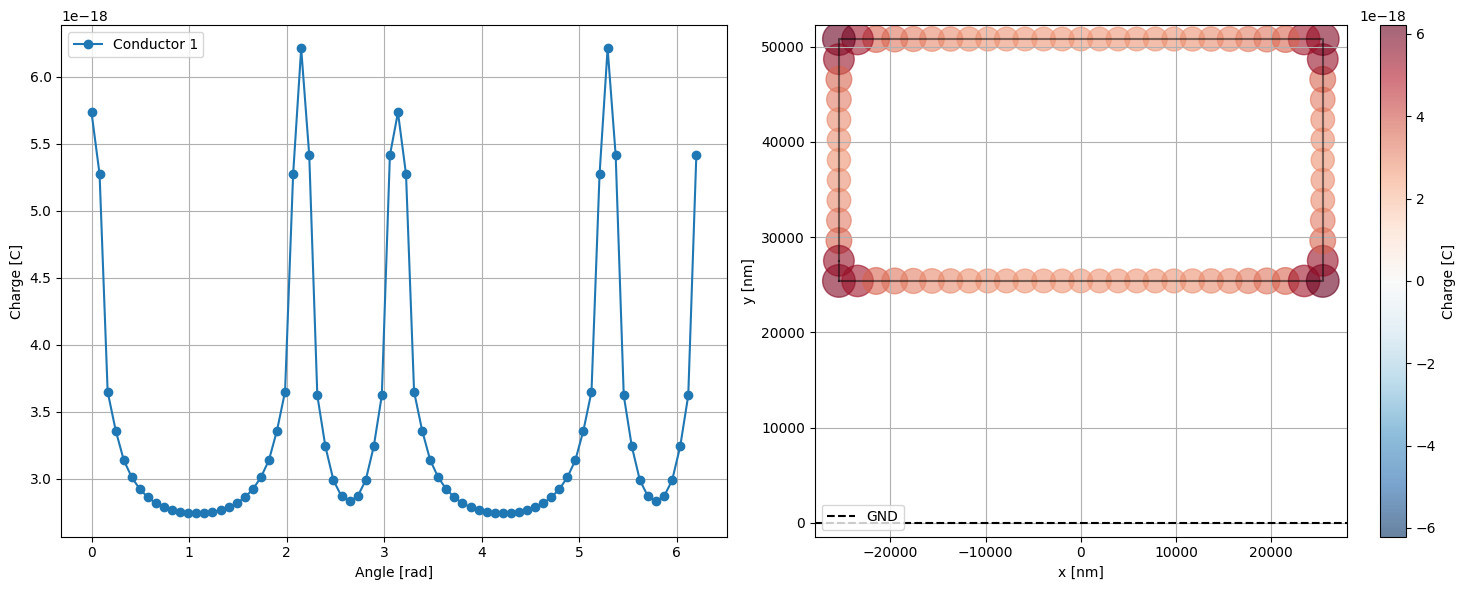

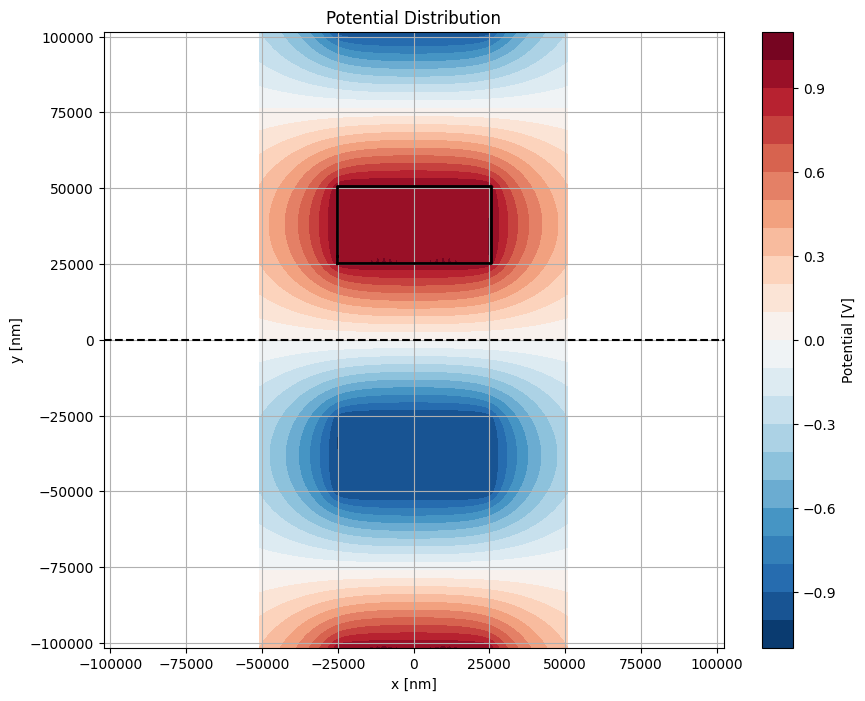

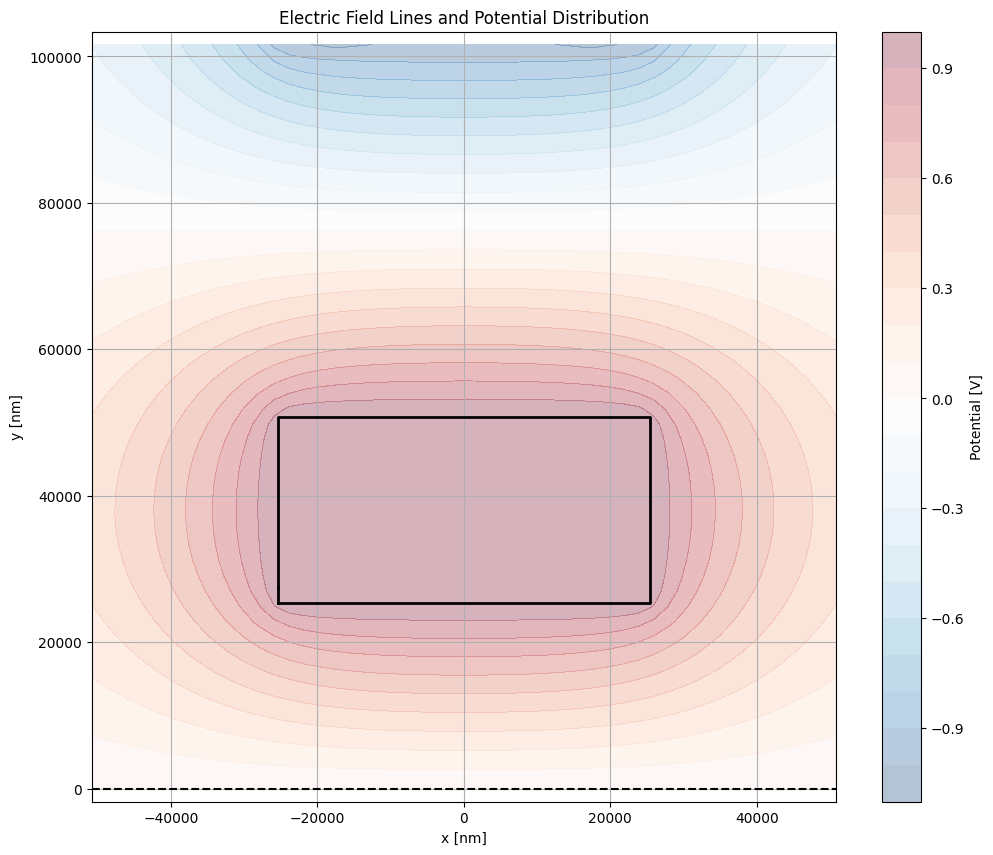


 C Matrix [F/m]:
[[1.29388979e-10]]

 L Matrix [H/m]:
[[1.71981642e-07]]

 Z Matrix [H/m]:
[[36.45796314]]
Conductor 1 charge density range: 1.8015727820570853e-12 3.6144926432114497e-12
Conductor 1 total charge: 4.4214097542953057e-16
Conductor 2 charge density range: -6.222844010529775e-13 -3.504709134467496e-18
Conductor 2 total charge: -1.869562166774364e-17


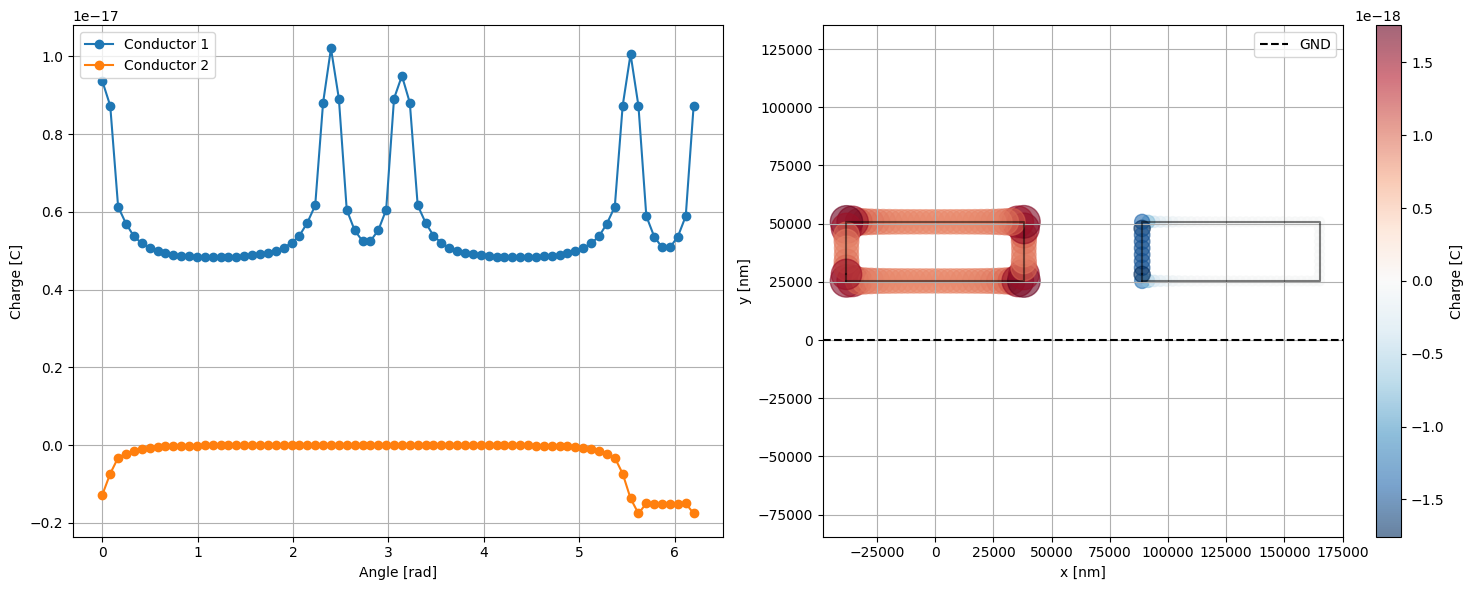

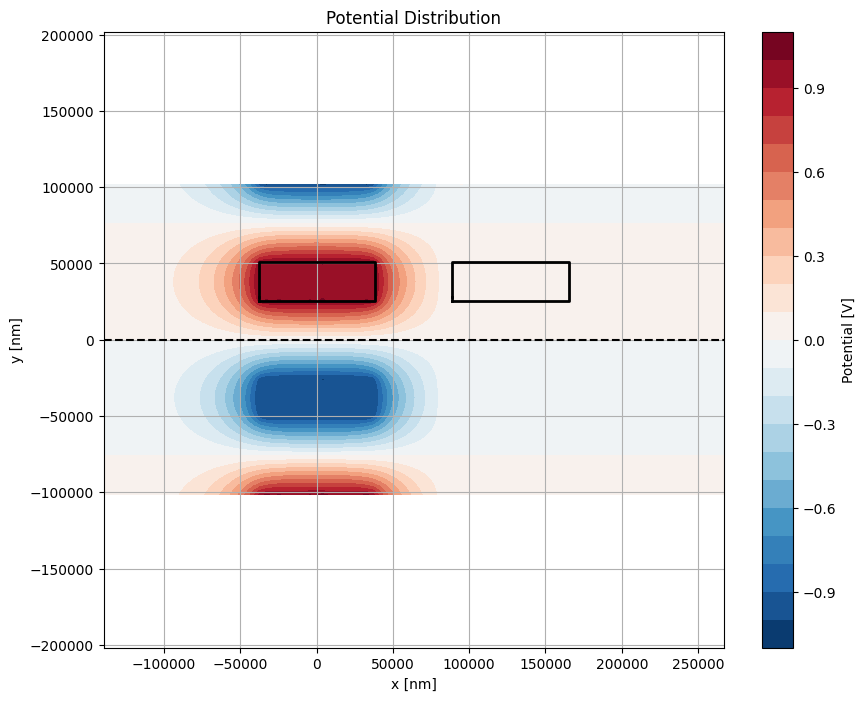

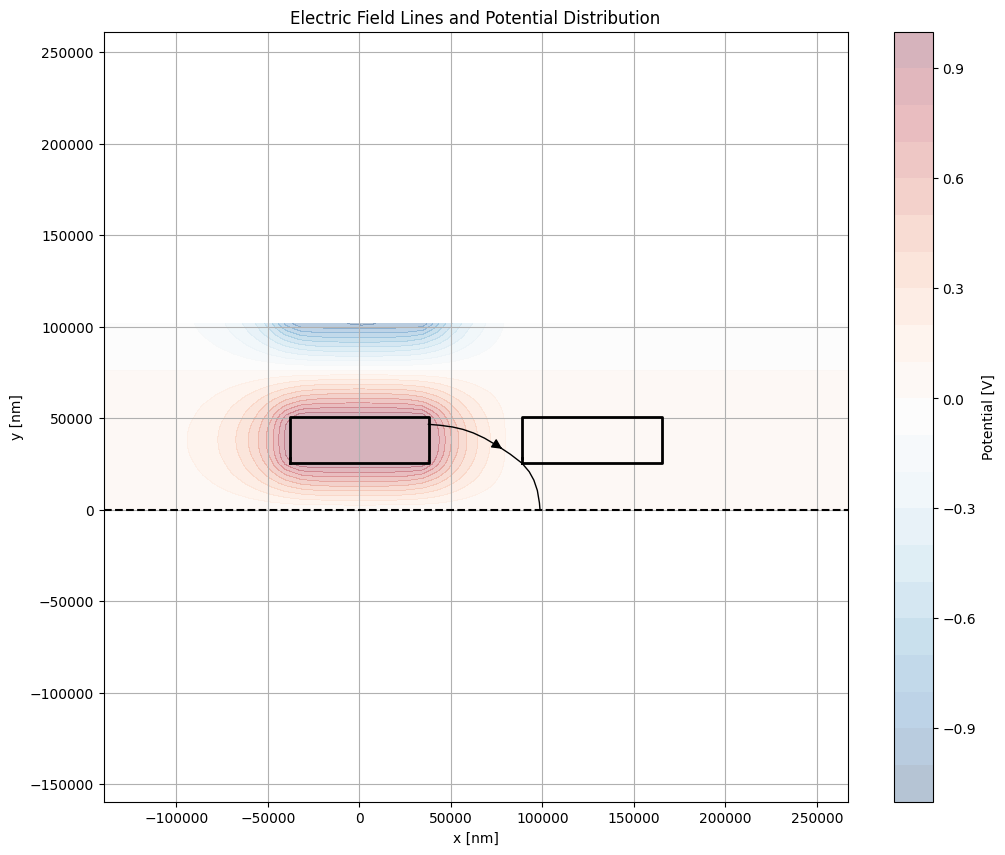


 C Matrix [F/m]:
[[ 1.65070815e-10 -6.74957344e-12]
 [-6.74957344e-12  1.65070815e-10]]

 L Matrix [H/m]:
[[1.35031717e-07 5.52130606e-09]
 [5.52130606e-09 1.35031717e-07]]

 Z Matrix [H/m]:
[[28.64895915  8.18585628]
 [ 8.18585628 28.64895915]]


In [1]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# PCB Microstrip Line 1導体のテスト
def test_pcb_ms1():
    calculator = MultiConductorCalculator(type="MS", epsilon_r=2.0)
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0

    # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )

    # 電圧設定
    voltages = [1.0]

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)

    # 容量行列
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms1.csv", unit_prefix='p' , length=0.0254 )
 
# PCB Microstrip Line 2導体のテスト
def test_pcb_ms2():
    calculator = MultiConductorCalculator(type="MS", epsilon_r=2.0)
    
    w = 7.62e-5  # 2mil
    h = 2.54e-5  # 1mil
    n = 80
    bh1 = 2.54e-5  # 1mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )

    # Modified voltages array to match the number of conductors
    voltages = [0.0 ,1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)


    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms2.csv", unit_prefix='p' , length=0.0254 )


# StripLineのテスト 1導体
def test_pcb_sp1():
    calculator = MultiConductorCalculator(type="SP", epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 5.08e-5  # 20mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )

    # Modified voltages array to match the number of conductors
    voltages = [1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # pf/inchで出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp1.csv", unit_prefix='p' , length=0.0254 )


# PCBのテスト 2導体
def test_pcb_sp2():
    calculator = MultiConductorCalculator(type="SP", epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 50mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )

    # Modified voltages array to match the number of conductors
    voltages = [1.0, 0.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp2.csv", unit_prefix='p', length=0.0254)


if __name__ == "__main__":
  test_pcb_ms1()
  test_pcb_ms2()
  test_pcb_sp1()
  test_pcb_sp2()
